<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

with open("m4_survey_data.sqlite", "wb") as f:
    f.write(response.content)

Connect to the database.


In [135]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [9]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [13]:
import matplotlib.pyplot as plt


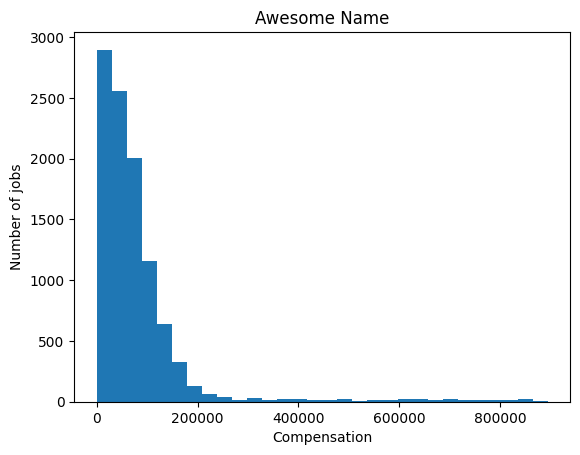

In [14]:
# your code goes here
QUERY = """
SELECT ConvertedComp as Compensation
FROM master
where ConvertedComp < 900000
"""

compensation = pd.read_sql_query(QUERY,conn)

plt.hist(compensation['Compensation'], bins =30)
plt.title('Awesome Name')
plt.xlabel('Compensation')
plt.ylabel('Number of jobs')
plt.show()


### Box Plots


Plot a box plot of `Age.`


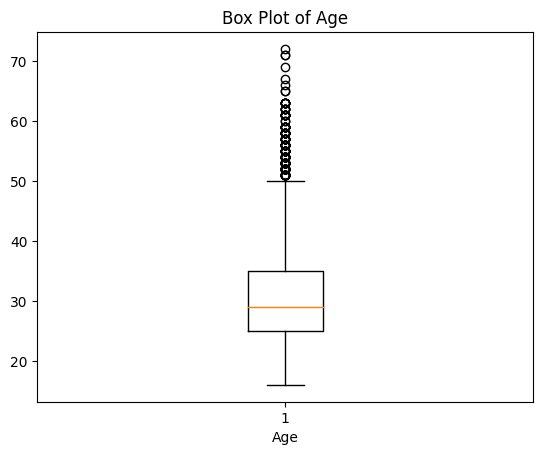

In [15]:
# i decided to exclude one age of 99 to make the graph look better
QUERY = """
SELECT Age FROM master WHERE Age IS NOT NULL and Age < 90;
"""

People_Age = pd.read_sql_query(QUERY, conn)
plt.boxplot(People_Age['Age'])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


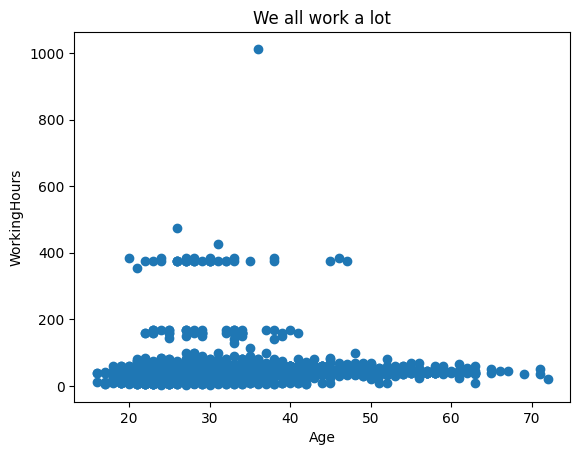

                  Age  WorkWeekHrs
Age          1.000000     0.036562
WorkWeekHrs  0.036562     1.000000


In [137]:
# your code goes here
QUERY = """
select Age, WorkWeekHrs from master
where Age <90
"""

AgeVsWork = pd.read_sql_query(QUERY, conn)
plt.scatter(x = 'Age', y = 'WorkWeekHrs', data = AgeVsWork)
plt.title('We all work a lot')
plt.xlabel('Age')
plt.ylabel('WorkingHours')
plt.show()

print(AgeVsWork.corr()) #need a corr coefficient to answer the QUIZ question. From the plot it is hard to tell

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [18]:
# your code goes here
QUERY = """
select WorkWeekHrs as Workload, CodeRevHrs as Debug, Age 
from master
where age <90 and Debug is not null and Workload is not null 
"""

df = pd.read_sql_query(QUERY, conn)
print(len(df['Workload']))
print(len(df['Age']))
print(len(df['Debug']))
print(len(df['Age']/2))

8668
8668
8668
8668


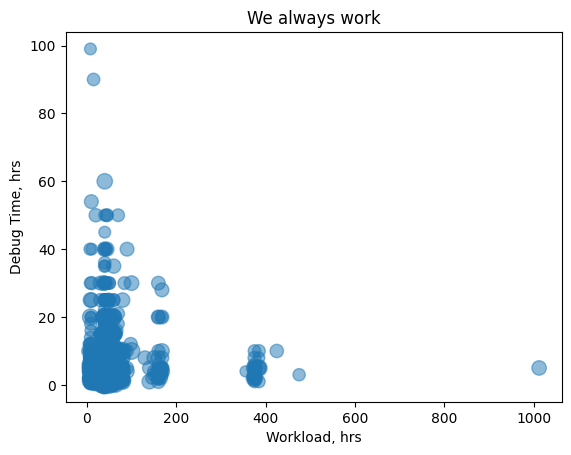

In [31]:
QUERY = """
select WorkWeekHrs as Workload, CodeRevHrs as Debug, Age 
from master
where age <90 and Debug is not null and Workload is not null 
"""

df = pd.read_sql_query(QUERY, conn)

plt.scatter(x=df['Workload'], y=df['Debug'], s=df['Age']*3, alpha=0.5)
plt.xlabel('Workload, hrs')
plt.ylabel('Debug Time, hrs')
plt.title('We always work')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


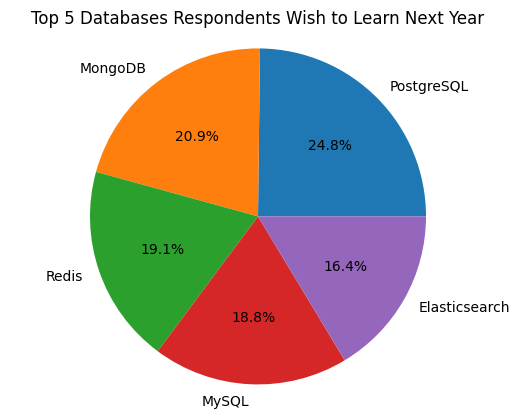

In [82]:
# your code goes here
QUERY = """
select Databasedesirenextyear as DesiredDB, count(*) as TotalNumber from Databasedesirenextyear
group by DesiredDB
order by TotalNumber DESC 
limit 5
"""

df = pd.read_sql_query(QUERY, conn)

counts = df['TotalNumber']
labels = df['DesiredDB']

plt.pie(counts, labels=labels, autopct='%.1f%%')
plt.axis('equal')  
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

In [145]:
#answering QUIZ question

QUERY = """
Select count(LanguageDesireNextYear) as N_of_respondents, LanguageDesireNextYear from LanguageDesirenextYear
group by LanguageDesireNextYear
order by N_of_respondents DESC
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,N_of_respondents,LanguageDesireNextYear
0,6630,JavaScript
1,5328,HTML/CSS
2,5239,Python
3,5012,SQL
4,4088,TypeScript


In [151]:
#Answering QUIZ Question
QUERY = """
Select count(*) as N_of_respondents, LanguageWorkedWith from LanguageWorkedWith
where LanguageWorkedWith like '%Sql%'
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,N_of_respondents,LanguageWorkedWith
0,7106,SQL


In [159]:
#Answering QUIZ question
QUERY = """
Select count(*), DatabaseWorkedWith as DB from DatabaseWorkedWith
where DatabaseWorkedWith = "MySQL" AND Respondent NOT IN (
    SELECT Respondent FROM DatabaseWorkedWith WHERE DatabaseWorkedWith != 'MySQL')
group by DatabaseWorkedWith
"""

df = pd.read_sql_query(QUERY, conn)
df.head(10)

,count(*),DB
0,474,MySQL


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


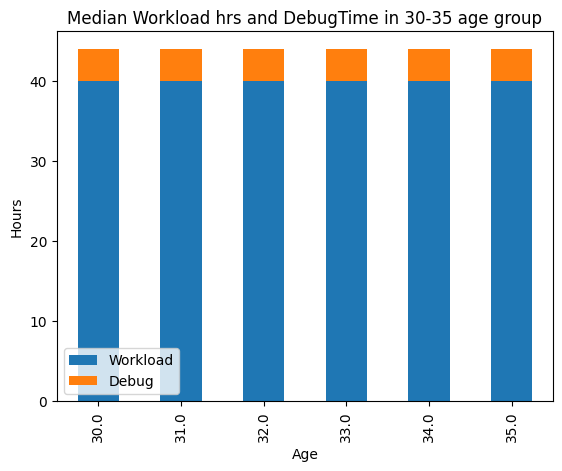

In [97]:
# your code goes here
QUERY = """
Select Age, WorkWeekHrs as Workload, CodeRevHrs as Debug from master
where age between 30 and 35

"""
df = pd.read_sql_query(QUERY, conn)

df_median = df.groupby('Age').median()

df_median.plot(kind='bar',stacked=True)
plt.title('Median Workload hrs and DebugTime in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

In [165]:
#Answering QUIZ questions
QUERY = """
select count(*) as Number_of_Respondents, DevType from DevType
group by DevType
order by Number_of_Respondents DESC
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,Number_of_Respondents,DevType
0,6928,"Developer, full-stack"
1,6290,"Developer, back-end"
2,3920,"Developer, front-end"
3,2575,"Developer, desktop or enterprise applications"
4,1959,"Developer, mobile"


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


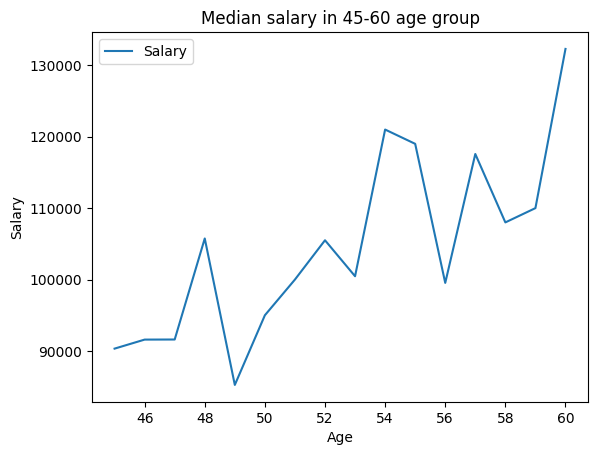

In [108]:
# your code goes here
QUERY = """
select Age, ConvertedComp as Salary from master
where age between 45 and 60
"""

df = pd.read_sql_query(QUERY, conn)

median_salary = df.groupby('Age').median()

median_salary.plot(kind = 'line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


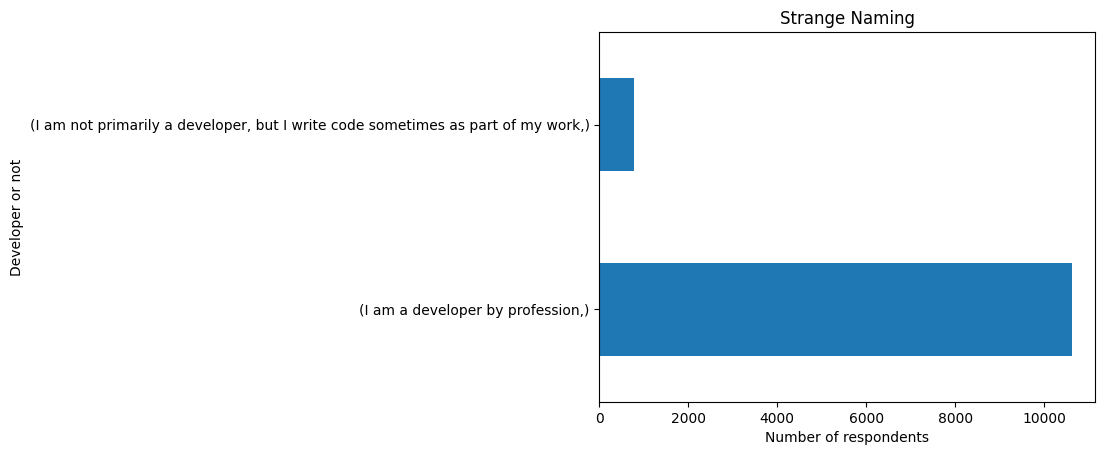

In [132]:
# your code goes here
QUERY = """
Select MainBranch from master
"""

df = pd.read_sql_query(QUERY, conn)
DevOrNot = df.value_counts()

DevOrNot.plot(kind = 'barh')
plt.title('Strange Naming')
plt.xlabel('Number of respondents')
plt.ylabel('Developer or not')
plt.show()

Close the database connection.


In [133]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
